In [1]:
import cv2
import numpy as np
import glob
import time
import skimage.io as io
from skimage.filters import *
import matplotlib.pyplot as plt
from skimage.morphology import *
from skimage.exposure import equalize_hist
from skimage.filters import gaussian,median
import math
from scipy  import signal 
from segmentation import *

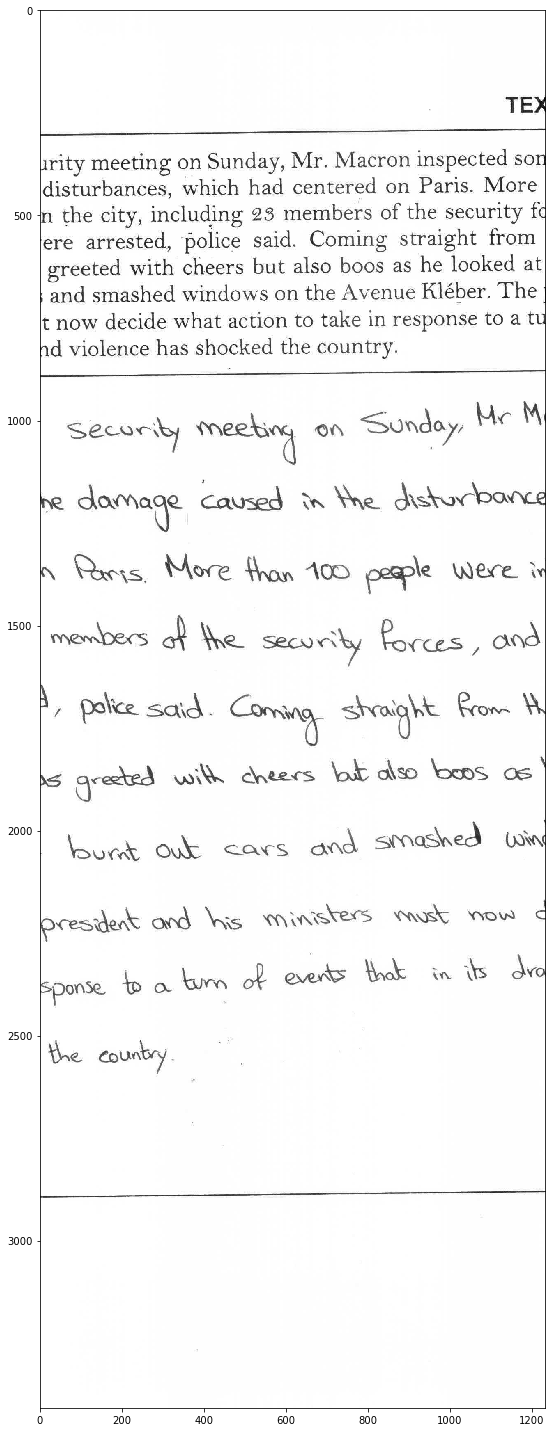

In [2]:
# gs_img = cv2.imread("test/2/1.jpg",0)
gs_img = cv2.imread("D:/Study/4th year/PATTERN/01/1/2.png",0)
gs_img_croped =gs_img[:,gs_img.shape[1]//4: gs_img.shape[1]-gs_img.shape[1]//4 ]
plt.figure(figsize=(20,20))
io.imshow(gs_img_croped)

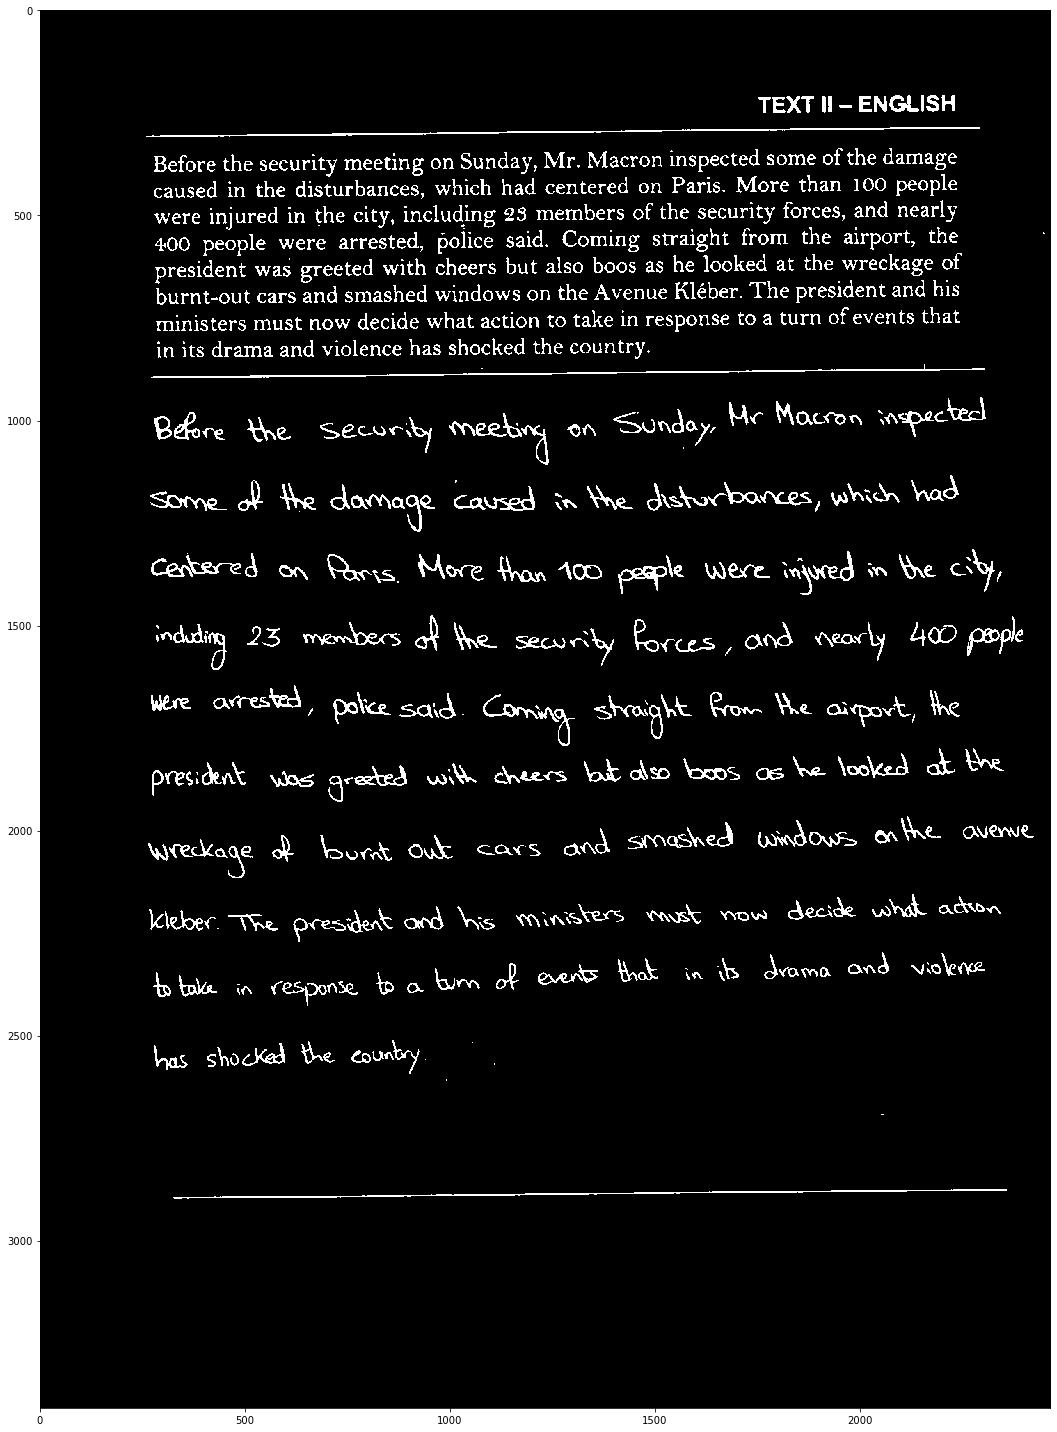

In [3]:
b_img=binarize_gray_img(gs_img)
plt.figure(figsize=(20,20))
io.imshow(b_img)

[(306, 294), (893, 883), (2889, 2880), (302, 295)]


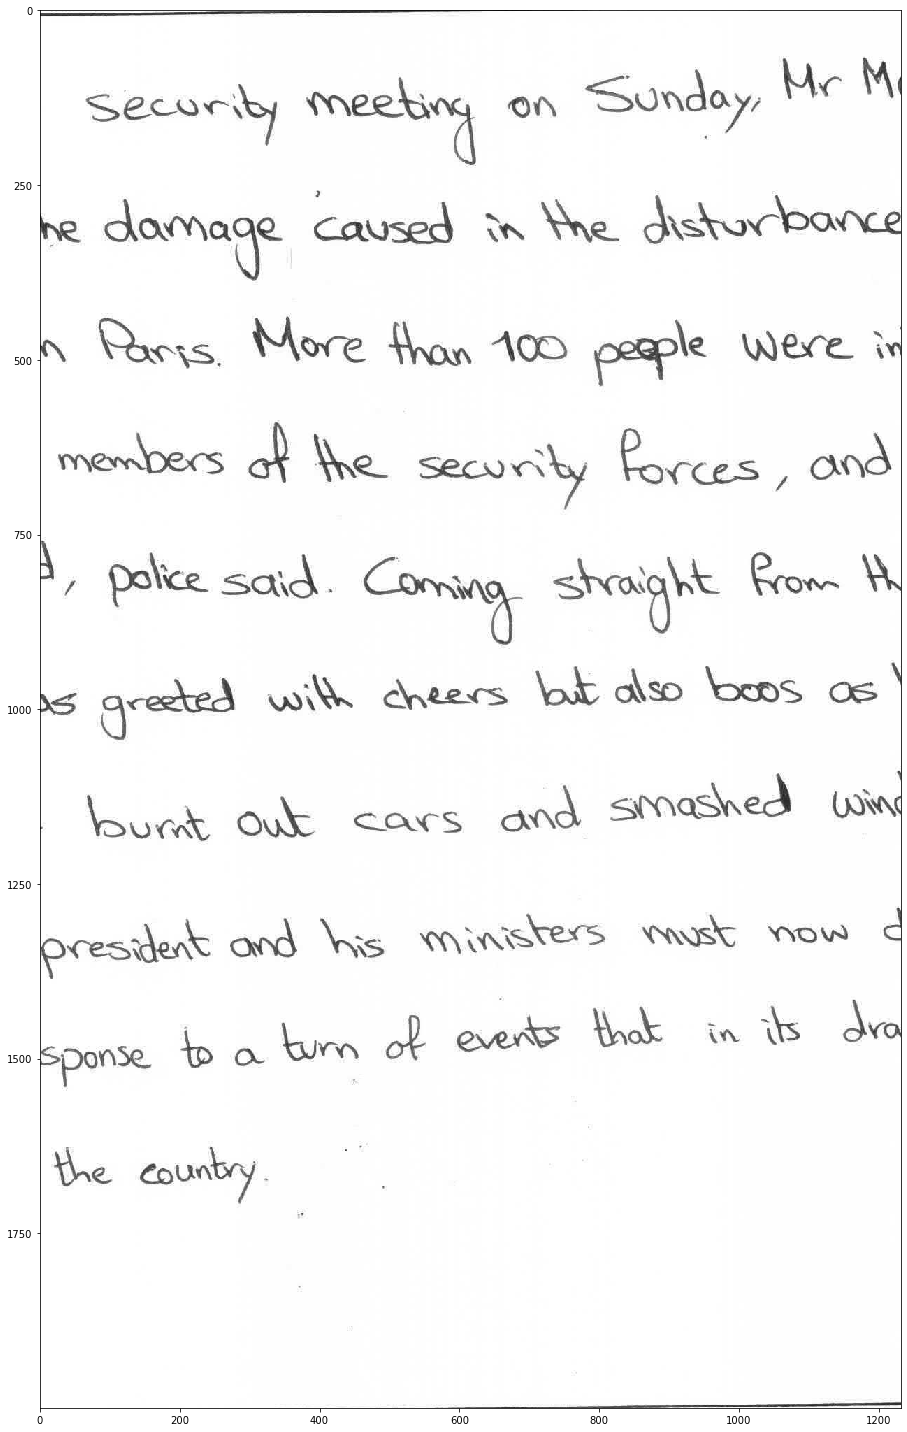

In [6]:
croped = get_writtig_area(gs_img_croped, b_img)
plt.figure(figsize=(20,20))
io.imshow(croped)

In [5]:
   
def get_lines_positions(bin_img):
    # this function return unique indexes of the horizontal lines  
    staff_lines_img = extract_lines(bin_img)
    unique_indexes, _ = remove_duplicates(staff_lines_img)
    return unique_indexes


In [6]:
print(get_lines_positions(b_img))

[ 308  658 2800]


In [7]:
line_limits = get_writing_lines_limits(croped)

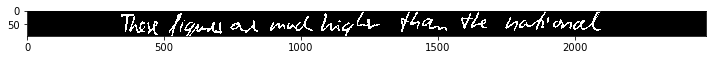

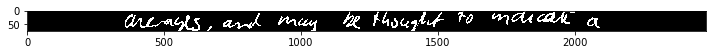

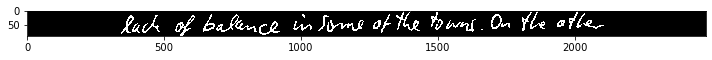

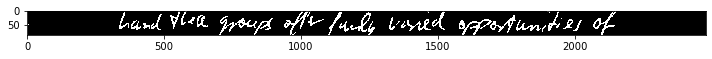

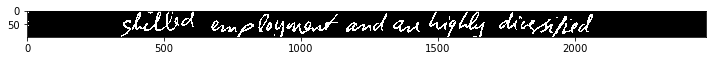

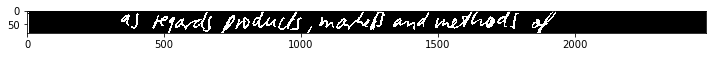

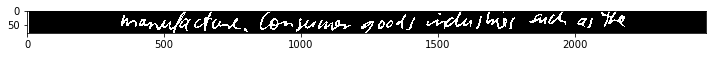

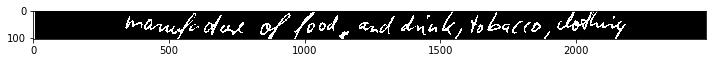

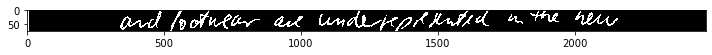

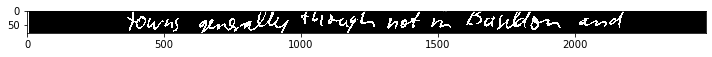

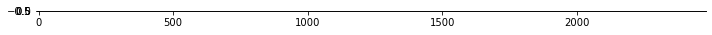

In [8]:
for limit in line_limits:
    plt.figure(figsize=(10,20))
    io.imshow(croped[limit[0]:limit[1] ,:])

In [9]:
def plot_h_proj(image, figsize=(5,5)):
    x, _ = image.shape
    y_plot = np.arange(0,x,1)
    h_proj = np.sum(image,axis=1)
    h_proj-=int(np.mean(h_proj))
    _, (ax1, ax2) = plt.subplots(1,2,sharey=True,figsize=figsize)
    plt.gray()
    ax1.imshow(image, aspect='auto')
    ax2.barh(y_plot, h_proj)

In [10]:
# plot_h_proj(croped,(20,20))

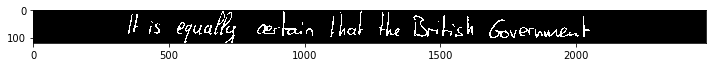

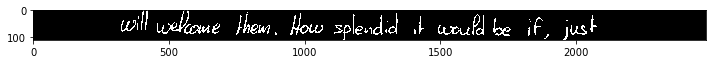

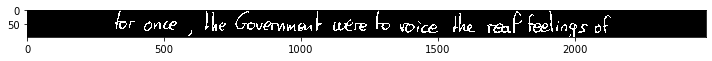

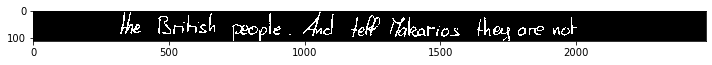

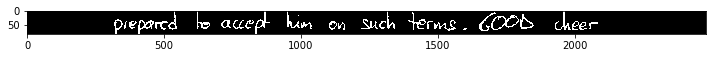

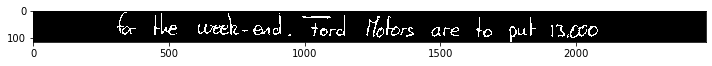

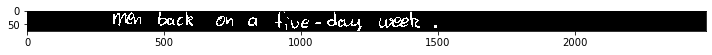

In [11]:
def extract_slant_features (line ):
    ######## These set of features are extracted based on This Paper : ##########
    ####### Writer Identification Using Edge-Based Directional Features #########


    #apply canny filter to get image edges
    edges = 255 - cv2.Canny(line, 0, 250)
        
    plt.figure(figsize=(10,20))
    io.imshow(cv2.Canny(line, 0, 250),cmap="gray")
    plt.figure(figsize=(10,20))
    io.imshow(edges,cmap="gray")
    line_inverted = 1 - (edges / np.max(line))
    features = []
    
    process_line = line_inverted [2:line.shape[0]-2,2:line.shape[1]-2 ]
    plt.figure(figsize=(10,20))
    io.imshow(line_inverted,cmap="gray")
    plot_h_proj(line_inverted)
    # get black pixels
    y_mask, x_mask = np.where(process_line == 1)
    # get slant features
    
    features.append(np.sum(line_inverted[y_mask +1, x_mask]))
    features.append(np.sum(line_inverted[y_mask +2, x_mask]))

    features.append(np.sum(line_inverted[y_mask - 1, x_mask]))
    features.append(np.sum(line_inverted[y_mask - 2, x_mask]))
    print(line_inverted[y_mask - 1, x_mask])
    features.append(np.sum(line_inverted[y_mask + 1, x_mask + 1]))
    features.append(np.sum(line_inverted[y_mask + 1, x_mask + 2]))
    features.append(np.sum(line_inverted[y_mask + 2, x_mask + 1]))
    features.append(np.sum(line_inverted[y_mask + 2, x_mask + 2]))

    features.append(np.sum(line_inverted[y_mask - 1, x_mask + 1]))
    features.append(np.sum(line_inverted[y_mask - 1, x_mask + 2]))
    features.append(np.sum(line_inverted[y_mask - 2, x_mask + 1]))
    features.append(np.sum(line_inverted[y_mask - 2, x_mask + 2]))
  
    return features/np.sum(features)

[0. 0. 0. ... 0. 0. 0.]


array([0.03128534, 0.04582413, 0.02929298, 0.03667008, 0.04323946,
       0.16504227, 0.12347208, 0.3774164 , 0.03338539, 0.04157019,
       0.03537774, 0.03742394])

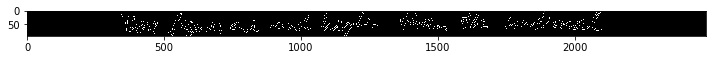

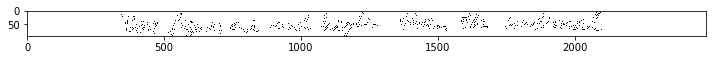

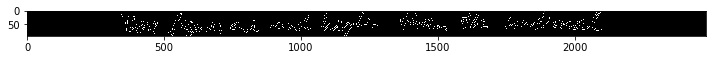

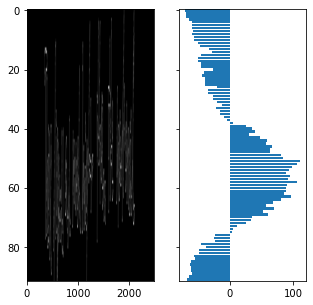

In [12]:
extract_slant_features(croped[line_limits[0][0]:line_limits[0][1]])
# array([0.2467012 , 0.14070875, 0.07463255, 0.0501057 , 0.05710908,
#        0.04584757, 0.13147111, 0.07646605, 0.10292659, 0.0740314 ])

In [ ]:
io.imshow(b_img)

In [14]:

AllFunctionalities(b_img,True)

In [13]:
f = open("F:\\Pattern_Proj_Dataset\\ascii\\forms.txt",'r') # File called form in ascii from dataset 
# this file has the name of all writer along with the name of each photo 
#Name of each photo is in file name and Writer ID is in same index but in Writer ID array
FileNames = []
WriterID = []
for i in range(16):
    next(f,None)
for line in f:
    Splitted = line.split(sep=' ')
    FileNames.append(Splitted[0])
    WriterID.append(Splitted[1])


f.close()

FileNotFoundError: [Errno 2] No such file or directory: 'F:\\Pattern_Proj_Dataset\\ascii\\forms.txt'

In [24]:
Dataset_FileName = 'F:\\Pattern_Proj_Dataset\\Form\\'
Dataset_Files = 'F:\\Pattern_Proj_Dataset\\Form\\*.png'

def ShowImage(name,formName='image'):
    res = cv2.resize(name,(768,768))
    cv2.imshow(formName,res)
    cv2.waitKey(0);
    
def returnFilePath(name):
    return Dataset_FileName + name + '.png'

def CompareToImage(img,img2,name1='image1',name2='image2'):
    res = cv2.resize(img,(768,768))
    cv2.imshow(name1,res)
    ShowImage(img2,name2)

In [17]:
# houghlines variables

rho = 10 # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 1  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 350  # minimum number of pixels making up a line
max_line_gap = 5# maximum gap in pixels between connectable line segments

get lines changes gets all line using houghtransformP
draw Lines , draw the output of getlines on the original 

In [31]:
img = cv2.imread(returnFilePath('a01-000u'),0)
ShowImage(img)

In [30]:
img = cv2.imread(returnFilePath(FileNames[0]),0)
ShowImage(img)

In [37]:
#No Crop
ImgWithLines , lines = AllFunctionalities(img,printLine=True)
ShowImage(ImgWithLines)

8
Start : ( 13 , 3541 ) , End : ( 13 , 1282 ) 
Start : ( 16 , 2708 ) , End : ( 16 , 2299 ) 
Start : ( 0 , 3381 ) , End : ( 0 , 1182 ) 
Start : ( 0 , 135 ) , End : ( 10 , 764 ) 
Start : ( 1547 , 2788 ) , End : ( 2180 , 2788 ) 
Start : ( 369 , 359 ) , End : ( 899 , 359 ) 
Start : ( 427 , 609 ) , End : ( 1138 , 609 ) 
Start : ( 4 , 498 ) , End : ( 10 , 866 ) 


Notes:
When image is cropped , different lines are found even if the same function is used

Sometimes a line is found if image is cropped but cant be found if image is not cropped , and vice versa

In [38]:
# With Crop
ImgWithLines , lines = AllFunctionalities(img[400:,300:],printLine=True)
ShowImage(ImgWithLines)

3
Start : ( 125 , 209 ) , End : ( 836 , 209 ) 
Start : ( 296 , 2393 ) , End : ( 1005 , 2393 ) 
Start : ( 86 , 2395 ) , End : ( 625 , 2395 ) 


Notice that lines 3 and 4 have a difference of two in the Y axis , so basically are the same line